In [8]:
from template import *
import utils as utl

Define template parameters

In [9]:
gp = 0.9
ga = 0.1
wp = 100
wa = 130
template_type = TemplateType.LP
approximation_function = ApproximationFunction.Butter

template = Template(ga, gp, [wp, wa], template_type)
template.set_approximation_function(approximation_function)

Once a template is created, the xi and the order are calculated for the selected approximation function

In [10]:
template.find_xi()
template.find_n()

ipd.display(template.xi_val, "Xi")
ipd.display(template.order, "Order")

'Xi'

'Order'

Then, the approximation function is calculated and the F(w) is calculated.

In [11]:
template.get_correct_approx_function()
template.generate_fw_function()

ipd.display(template.approximation_function_expr, "Approximation Function")
ipd.display(template.approximation_function_expr.simplify(), "Approximation Function Simplified")
ipd.display(template.fw_function, "F(w) Function")
ipd.display(template.fw_function.simplify(), "F(w) Simplified")

'Approximation Function'

'Approximation Function Simplified'

'F(w) Function'

'F(w) Simplified'

Then, the G(s) = F(s/j) is calculated and its pz map is drawn

In [12]:
template.generate_gs_function()

ipd.display(template.gs_function, "G(s) Function")

'G(s) Function'

Finally, the final transfer function is generated by culling the poles with positive real part

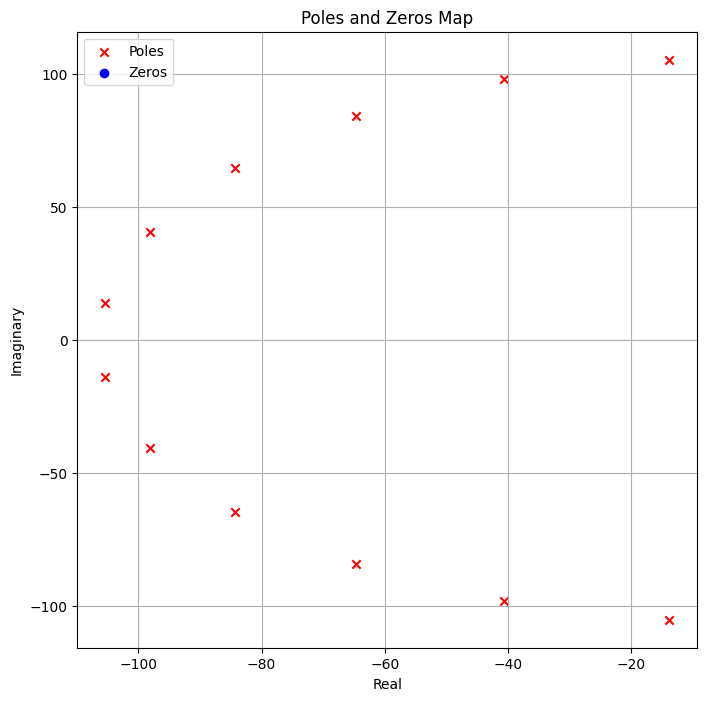

'Poles:'

'1) Wo:106.22794981859653, Phase:1.7016960277020143, Q:3.830648583874063'

'2) Wo:106.22794981859653, Phase:-1.7016960277020143, Q:3.8306485838740736'

'3) Wo:106.22795498094298, Phase:1.9634953956504206, Q:1.3065630053879669'

'4) Wo:106.22795498094298, Phase:-1.9634953956504206, Q:1.3065630053879664'

'5) Wo:106.22794899148319, Phase:2.2252948209978918, Q:0.8213397894081548'

'6) Wo:106.22794899148319, Phase:-2.2252948209978918, Q:0.8213397894081549'

'7) Wo:106.22795491571542, Phase:2.4870941432752836, Q:0.6302362267439463'

'8) Wo:106.22795491571542, Phase:-2.4870941432752836, Q:0.6302362267439462'

'9) Wo:106.22795281081028, Phase:3.0106928936746087, Q:0.5043144846731351'

'10) Wo:106.22795281081028, Phase:-3.0106928936746087, Q:0.5043144846731351'

'11) Wo:106.22795012931208, Phase:2.7488936283100873, Q:0.5411960874987037'

'12) Wo:106.22795012931208, Phase:-2.7488936283100873, Q:0.5411960874987037'

'Zeros:'

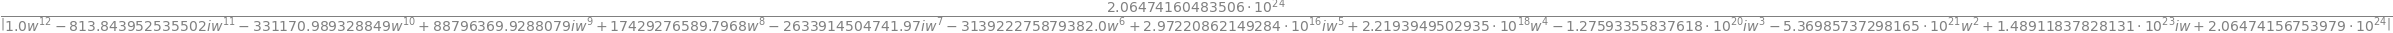

'Transfer Function Absolute Value'

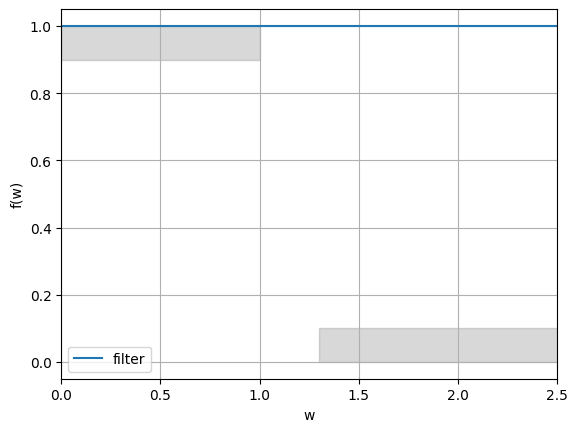

'The goal is to have a function that is symmetric (either even or odd) and is restricted between -1 and 1 for x values between -1 and 1'

'This is the approximation function Y(w):'

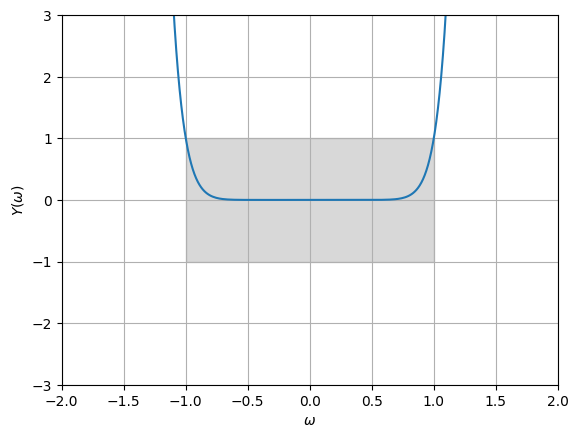

'Then, the vertical scale of the function is reduced to accommodate for the height of the pass band.This is achieved by multiplying the function by the xi factor'

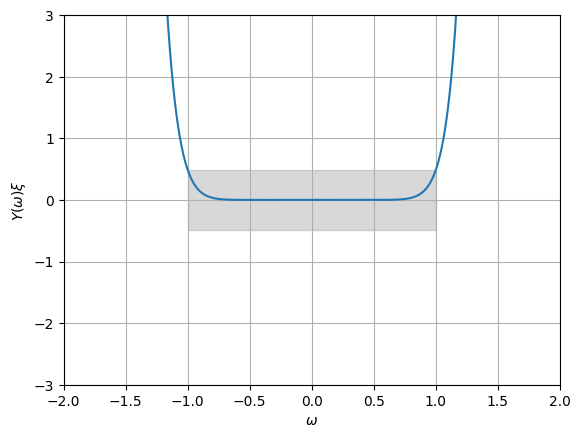

To ensure the function is even and its codomain is the positive real numbers, the entire expression is squared


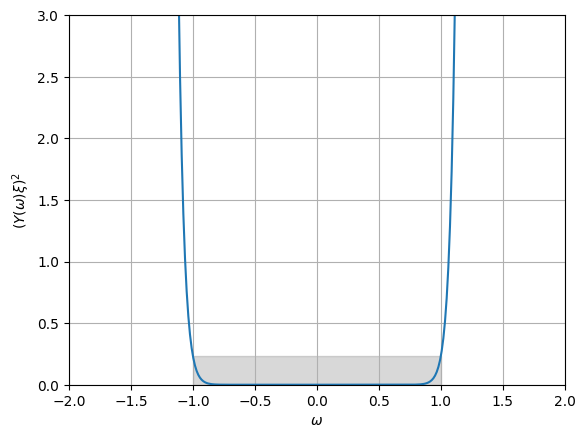

Since the normalized low pass filter has a DC gain of 0 (1 in linear scale), a 1 is added to the expression so that the starting point of the function is 1


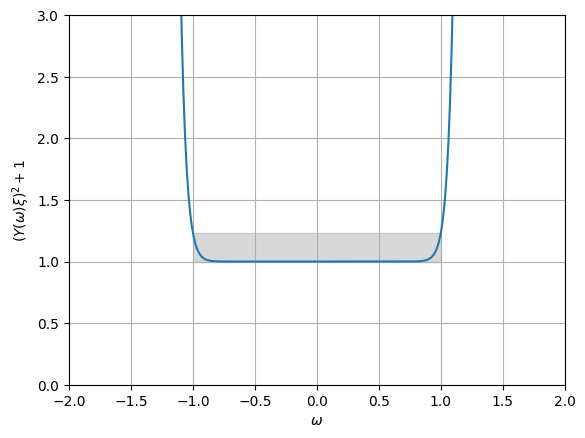

Lastly, the entire expression is inverted so that the it behaves like a low pass amplitude transfer function


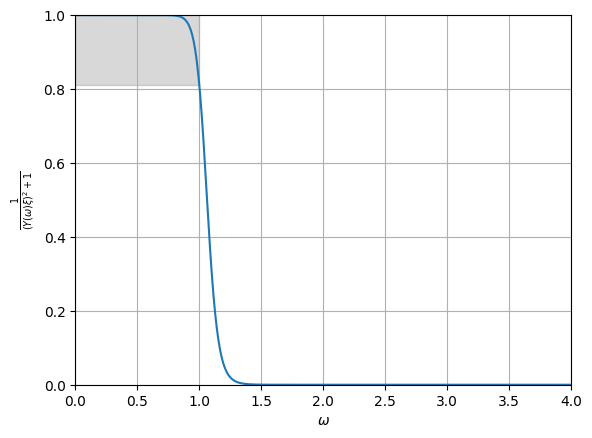

In [13]:
template.generate_final_tf()
utl.print_pzm(template.final_function)
template.print_filter(normalized=True)
template.show_transformations()

Finally, the bode diagram of the filter is the following:

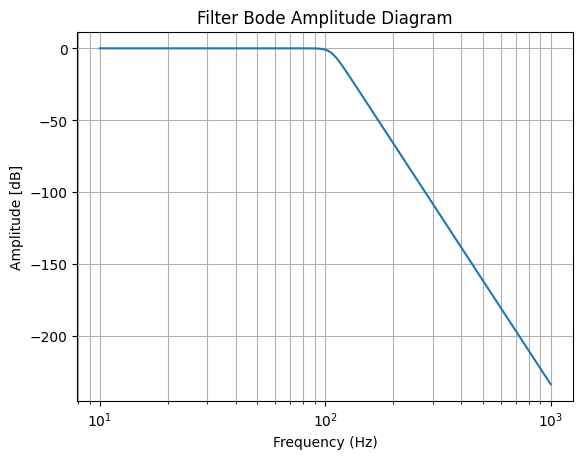

In [14]:
utl.print_bode(template.final_function)